In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as L
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
import seaborn as sns


import numpy as np 
import pandas as pd

import nltk
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords

import re

#Data Cleaning


In [ ]:
train = pd.read_csv('Corona_NLP_train.csv',encoding='latin1')
test = pd.read_csv('Corona_NLP_test.csv',encoding='latin1')

In [ ]:
test.isna().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

In [ ]:
x = train['OriginalTweet'].copy()
y = train['Sentiment'].copy()

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def data_cleaner(tweet):
    
    # remove urls
    tweet = re.sub(r'http\S+', ' ', tweet)
    
    # remove html tags
    tweet = re.sub(r'():;<.*?>',' ', tweet)
    
    # remove digits
    tweet = re.sub(r'\d+',' ', tweet)
    
    # remove hashtags
    tweet = re.sub(r'#\w+',' ', tweet)
    
    # remove mentions
    tweet = re.sub(r'@\w+',' ', tweet)
    
    #removing stop words
    tweet = tweet.split()
    tweet = " ".join([word for word in tweet if not word in stop_words])
    
    return tweet


stop_words = stopwords.words('english')

x_cleaned = x.apply(data_cleaner)
x_cleaned.head()

0                                                     
1    advice Talk neighbours family exchange phone n...
2    Coronavirus Australia: Woolworths give elderly...
3    My food stock one empty... PLEASE, panic, THER...
4    Me, ready go supermarket outbreak. Not I'm par...
Name: OriginalTweet, dtype: object

In [ ]:
x_cleaned

0                                                         
1        advice Talk neighbours family exchange phone n...
2        Coronavirus Australia: Woolworths give elderly...
3        My food stock one empty... PLEASE, panic, THER...
4        Me, ready go supermarket outbreak. Not I'm par...
                               ...                        
41152    Airline pilots offering stock supermarket shel...
41153    Response complaint provided citing COVID- rela...
41154    You know itÂs getting tough rationing toilet ...
41155      Is wrong smell hand sanitizer starting turn on?
41156    Well new/used Rift S going $ . Amazon rn altho...
Name: OriginalTweet, Length: 41157, dtype: object

# Data Preprocessing

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_cleaned)

x = tokenizer.texts_to_sequences(x_cleaned)

vocab_size = len(tokenizer.word_index)+1

print("Vocabulary size: {}".format(vocab_size))
print("\nExample:\n")
print("Sentence:\n{}".format(x_cleaned[6]))
print("\nAfter tokenizing :\n{}".format(x[6]))

x = pad_sequences(x, padding='post')
print("\nAfter padding :\n{}".format(x[6]))

Vocabulary size: 36117

Example:

Sentence:
Cashier grocery store sharing insights To prove credibility commented "I'm Civics class I know I'm talking about".

After tokenizing :
[1174, 7, 4, 1269, 761, 65, 2902, 9761, 9762, 154, 18316, 1501, 2, 62, 154, 900, 958]

After padding :
[ 1174     7     4  1269   761    65  2902  9761  9762   154 18316  1501
     2    62   154   900   958     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0]


In [ ]:
y.shape

(41157,)

In [ ]:
encoding = {'Extremely Negative': 0,
            'Negative': 0,
            'Neutral': 1,
            'Positive':2,
            'Extremely Positive': 2
           }

labels = ['Negative', 'Neutral', 'Positive']
           

y.replace(encoding, inplace=True)


In [ ]:
y

0        1
1        2
2        2
3        2
4        0
        ..
41152    1
41153    0
41154    2
41155    1
41156    0
Name: Sentiment, Length: 41157, dtype: int64

In [ ]:
y.describe()

count    41157.000000
mean         1.064339
std          0.899153
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: Sentiment, dtype: float64

# Baseline: Logistic Regression 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
# Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english')

cv.fit(x_cleaned)
x_cleaned = cv.transform(x_cleaned)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x_cleaned, y, train_size=0.80)

In [ ]:
# Find the best value of C in logistic regression
for c in [0.05, 0.25, 0.5, 1]:
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print('Accuracy for C=%s: %s'
    % (c, accuracy_score(y_test, lr.predict(X_test))))

Accuracy for C=0.05: 0.797983479105928


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy for C=0.25: 0.8175413022351797


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy for C=0.5: 0.8220359572400389
Accuracy for C=1: 0.8210641399416909


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
# Here I choose C=0.5 to build the final model.
final_model = LogisticRegression(C=0.5)
final_model.fit(X_train, y_train)
print('Final Model Accuracy: %s' %accuracy_score(y_test, final_model.predict(X_test)))

Final Model Accuracy: 0.8220359572400389


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn import metrics
y_prediction_class = final_model.predict(X_test)
target_names = ['positive', 'neutral', 'negative']
score = metrics.precision_recall_fscore_support(y_true=y_test, y_pred=y_prediction_class)
print(classification_report(y_true=y_test, y_pred=y_prediction_class, target_names=target_names))

              precision    recall  f1-score   support

    positive       0.84      0.81      0.83      3118
     neutral       0.72      0.80      0.76      1566
    negative       0.86      0.84      0.85      3548

    accuracy                           0.82      8232
   macro avg       0.81      0.82      0.81      8232
weighted avg       0.82      0.82      0.82      8232



# CNN

In [ ]:
from keras.models import Sequential
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [ ]:
from keras.utils import to_categorical
y = to_categorical(y)
print(y)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 ...
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [ ]:
x = sequence.pad_sequences(x, maxlen=48)
model = Sequential()      
model.add(Embedding(vocab_size, 16, input_length=x.shape[1]))
model.add(Conv1D(32, 3, padding='same', activation='relu'))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 48, 16)            577872    
_________________________________________________________________
conv1d (Conv1D)              (None, 48, 32)            1568      
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 24, 32)            0         
_________________________________________________________________
flatten (Flatten)            (None, 768)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                49216     
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 195       
Total params: 628,851
Trainable params: 628,851
Non-trainable params: 0
__________________________________________________

In [ ]:
## preprocessing test data
X_test = test['OriginalTweet'].copy()
y_test = test['Sentiment'].copy()

X_test = X_test.apply(data_cleaner)

X_test = tokenizer.texts_to_sequences(X_test)

X_test = pad_sequences(X_test, padding='post')

y_test.replace(encoding, inplace=True)
y_test = to_categorical(y_test)

In [ ]:
# Fitting the data onto model
model.fit(x, y, validation_data=(X_test, y_test), epochs=5, batch_size=128, verbose=1, validation_split=0.2)

Epoch 1/5
258/258 [==============================] - 2s 9ms/step - loss: 0.0699 - accuracy: 0.9494 - val_loss: 1.2125 - val_accuracy: 0.6882
Epoch 2/5
258/258 [==============================] - 2s 9ms/step - loss: 0.0673 - accuracy: 0.9506 - val_loss: 1.2753 - val_accuracy: 0.6895
Epoch 3/5
258/258 [==============================] - 2s 9ms/step - loss: 0.0657 - accuracy: 0.9513 - val_loss: 1.3416 - val_accuracy: 0.6896
Epoch 4/5
258/258 [==============================] - 2s 9ms/step - loss: 0.0637 - accuracy: 0.9523 - val_loss: 1.4159 - val_accuracy: 0.6862
Epoch 5/5
258/258 [==============================] - 2s 9ms/step - loss: 0.0625 - accuracy: 0.9525 - val_loss: 1.4506 - val_accuracy: 0.6876


# Character Level CNN

In [ ]:
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.layers import Input, Embedding, Activation, Flatten, Dense
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.models import Model

In [ ]:
train_data_source = 'Corona_NLP_train.csv'
test_data_source = 'Corona_NLP_test.csv'

train_df = pd.read_csv(train_data_source, encoding='latin1')
test_df = pd.read_csv(test_data_source, encoding='latin1')


# convert string to lower case
train_texts = train_df['OriginalTweet'].values
train_texts = [s.lower() for s in train_texts]

test_texts = test_df['OriginalTweet'].values
test_texts = [s.lower() for s in test_texts]

In [ ]:
# =======================Convert string to index================
# Tokenizer
tk = Tokenizer(num_words=None, char_level=True, oov_token='UNK')
tk.fit_on_texts(train_texts)

# # construct a new vocabulary
alphabet = "abcdefghijklmnopqrstuvwxyz0123456789,;.!?:'\"/\\|_@#$%^&*~`+-=<>()[]{}"
char_dict = {}
for i, char in enumerate(alphabet):
    char_dict[char] = i + 1

# Use char_dict to replace the tk.word_index
tk.word_index = char_dict.copy()
# Add 'UNK' to the vocabulary
tk.word_index[tk.oov_token] = max(char_dict.values()) + 1

# Convert string to index
train_sequences = tk.texts_to_sequences(train_texts)
test_texts = tk.texts_to_sequences(test_texts)

In [ ]:
# Padding
train_data = pad_sequences(train_sequences, maxlen=344, padding='post')
test_data = pad_sequences(test_texts, maxlen=344, padding='post')

# Convert to numpy array
train_data = np.array(train_data, dtype='float32')
test_data = np.array(test_data, dtype='float32')

In [ ]:
# =======================Get classes================
train_classes = train_df['Sentiment'].copy()

encoding = {'Extremely Negative': 0,
            'Negative': 0,
            'Neutral': 1,
            'Positive':2,
            'Extremely Positive': 2
           }

labels = ['Negative', 'Neutral', 'Positive']
           

train_classes.replace(encoding, inplace=True)
train_classes = to_categorical(train_classes)


test_classes = test_df['Sentiment'].copy()

test_classes.replace(encoding, inplace=True)
test_classes = to_categorical(test_classes)

In [ ]:
# =====================Char CNN=======================
# parameter
input_size = 344
vocab_size = len(tk.word_index)
embedding_size = 69
conv_layers = [[256, 7, 3],
               [256, 7, 3],
               [256, 3, -1],
               [256, 3, -1],
               [256, 3, -1],
               [256, 3, 3]]

fully_connected_layers = [1024, 1024]
num_of_classes = 3
dropout_p = 0.4
optimizer = 'adam'
loss = 'categorical_crossentropy'

In [ ]:
# Embedding weights
embedding_weights = []  # (70, 69)
embedding_weights.append(np.zeros(vocab_size))  # (0, 69)

for char, i in tk.word_index.items():  # from index 1 to 69
    onehot = np.zeros(vocab_size)
    onehot[i - 1] = 1
    embedding_weights.append(onehot)

embedding_weights = np.array(embedding_weights)
print('Load')

# Embedding layer Initialization
embedding_layer = Embedding(vocab_size + 1,
                            embedding_size,
                            input_length=input_size,
                            weights=[embedding_weights])

Load


In [ ]:
# Model Construction
# Input
inputs = Input(shape=(input_size,), name='input', dtype='int64')  # shape=(?, 1014)
# Embedding
x = embedding_layer(inputs)
# Conv
for filter_num, filter_size, pooling_size in conv_layers:
    x = Conv1D(filter_num, filter_size)(x)
    x = Activation('relu')(x)
    if pooling_size != -1:
        x = MaxPooling1D(pool_size=pooling_size)(x)  # Final shape=(None, 34, 256)
x = Flatten()(x)  # (None, 8704)
# Fully connected layers
for dense_size in fully_connected_layers:
    x = Dense(dense_size, activation='relu')(x)  # dense_size == 1024
    x = Dropout(dropout_p)(x)
# Output Layer
predictions = Dense(num_of_classes, activation='softmax')(x)
# Build model
model = Model(inputs=inputs, outputs=predictions)
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])  # Adam, categorical_crossentropy
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 344)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 344, 69)           4830      
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 338, 256)          123904    
_________________________________________________________________
activation (Activation)      (None, 338, 256)          0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 112, 256)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 106, 256)          459008    
_________________________________________________________________
activation_1 (Activation)    (None, 106, 256)         

In [ ]:
# Shuffle
indices = np.arange(train_data.shape[0])
np.random.shuffle(indices)

x_train = train_data[indices]
y_train = train_classes[indices]

x_test = test_data
y_test = test_classes

# Training
model.fit(x_train, y_train,
          validation_data=(x_test, y_test),
          batch_size=128,
          epochs=5,
          verbose=1)

Epoch 1/5
322/322 [==============================] - 13s 39ms/step - loss: 0.3945 - accuracy: 0.8601 - val_loss: 0.6197 - val_accuracy: 0.7759
Epoch 2/5
322/322 [==============================] - 13s 39ms/step - loss: 0.3327 - accuracy: 0.8853 - val_loss: 0.7254 - val_accuracy: 0.7425
Epoch 3/5
322/322 [==============================] - 13s 39ms/step - loss: 0.2674 - accuracy: 0.9120 - val_loss: 0.7504 - val_accuracy: 0.7699
Epoch 4/5
322/322 [==============================] - 13s 39ms/step - loss: 0.2228 - accuracy: 0.9303 - val_loss: 0.8120 - val_accuracy: 0.7694
Epoch 5/5
322/322 [==============================] - 13s 39ms/step - loss: 0.1833 - accuracy: 0.9452 - val_loss: 0.8846 - val_accuracy: 0.7696


# GRU

In [ ]:
# Preprocess of test data
x_test = test['OriginalTweet'].copy()
y_test = test['Sentiment'].copy()

x_test = x_test.apply(data_cleaner)

x_test = tokenizer.texts_to_sequences(x_test)

x_test = pad_sequences(x_test,maxlen = x.shape[1], padding='post')

y_test.replace(encoding, inplace=True)

In [ ]:
from keras.layers import GRU
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Hyper parameters
BATCH_SIZE = 32
embedding_dim = 100

# Model Setting
GRU_model = tf.keras.Sequential([
    L.Embedding(vocab_size, embedding_dim, input_length=x.shape[1]),
    L.GRU(100),
    L.Dense(3, activation = 'softmax')
])


GRU_model.compile(loss=SparseCategoricalCrossentropy(from_logits=True),
              optimizer = 'adam',metrics=['accuracy'])

GRU_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 54, 100)           3611700   
_________________________________________________________________
gru_3 (GRU)                  (None, 100)               60600     
_________________________________________________________________
dense_3 (Dense)              (None, 3)                 303       
Total params: 3,672,603
Trainable params: 3,672,603
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Model Training
from keras.callbacks import ModelCheckpoint, EarlyStopping

eary_stopping = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=5,
    verbose=1,
    mode='auto')

callbacks = [eary_stopping]

GRU_history = GRU_model.fit(x, y, batch_size = BATCH_SIZE, epochs=20,
                              validation_data=(x_test,y_test), callbacks=callbacks)

Epoch 1/20
1287/1287 [==============================] - 47s 37ms/step - loss: 1.0509 - accuracy: 0.4359 - val_loss: 1.0438 - val_accuracy: 0.4071
Epoch 2/20
1287/1287 [==============================] - 47s 36ms/step - loss: 0.9380 - accuracy: 0.5852 - val_loss: 0.7830 - val_accuracy: 0.7654
Epoch 3/20
1287/1287 [==============================] - 47s 36ms/step - loss: 0.7252 - accuracy: 0.8236 - val_loss: 0.7350 - val_accuracy: 0.8125
Epoch 4/20
1287/1287 [==============================] - 47s 36ms/step - loss: 0.6705 - accuracy: 0.8794 - val_loss: 0.7128 - val_accuracy: 0.8362
Epoch 5/20
1287/1287 [==============================] - 47s 36ms/step - loss: 0.6485 - accuracy: 0.9019 - val_loss: 0.7144 - val_accuracy: 0.8344
Epoch 6/20
1287/1287 [==============================] - 47s 36ms/step - loss: 0.6354 - accuracy: 0.9153 - val_loss: 0.6984 - val_accuracy: 0.8504
Epoch 7/20
1287/1287 [==============================] - 48s 37ms/step - loss: 0.6282 - accuracy: 0.9224 - val_loss: 0.6937 -

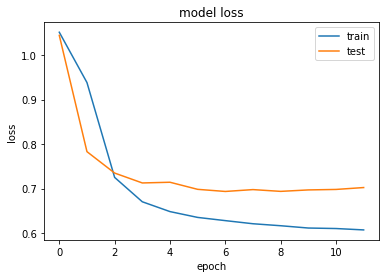

In [ ]:
# Evaluation
def plot_train_history_loss(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
plot_train_history_loss(GRU_history)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


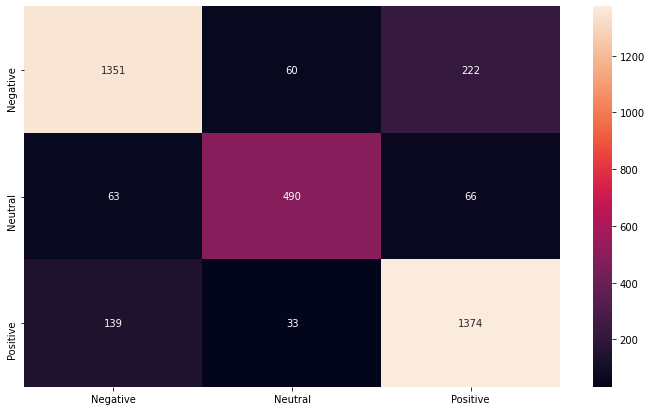

In [ ]:
# Confusion matrix

pred = GRU_model.predict_classes(x_test)

conf = confusion_matrix(y_test, pred)

cm = pd.DataFrame(
    conf, index = [i for i in labels],
    columns = [i for i in labels]
)

plt.figure(figsize = (12,7))
sns.heatmap(cm, annot=True, fmt="d")
plt.show()

# LSTM

In [ ]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.layers as tfkl
from tensorflow.keras.models import Sequential

In [ ]:
model1 =Sequential()
model1.add(tfkl.Embedding(vocab_size, 16, input_length=54))
model1.add(tfkl.LSTM(128,return_sequences=True))
model1.add(tfkl.GlobalMaxPool1D())
model1.add(tfkl.Dropout(0.4))
model1.add(tfkl.Dense(64,activation="relu"))
model1.add(tfkl.Dropout(0.4))
model1.add(tfkl.Dense(3,activation="softmax"))
model1.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=tfk.optimizers.RMSprop(lr=0.01),metrics=['accuracy'])
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 54, 16)            577872    
_________________________________________________________________
lstm (LSTM)                  (None, 54, 128)           74240     
_________________________________________________________________
global_max_pooling1d (Global (None, 128)               0         
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [ ]:
results1 = model1.fit(x, y, epochs=20, validation_split=0.2, batch_size=32)

Epoch 1/20
1029/1029 [==============================] - 9s 9ms/step - loss: 0.8746 - accuracy: 0.6629 - val_loss: 0.7944 - val_accuracy: 0.7543
Epoch 2/20
1029/1029 [==============================] - 9s 9ms/step - loss: 0.7605 - accuracy: 0.7889 - val_loss: 0.7503 - val_accuracy: 0.7997
Epoch 3/20
1029/1029 [==============================] - 9s 9ms/step - loss: 0.7320 - accuracy: 0.8182 - val_loss: 0.7282 - val_accuracy: 0.8224
Epoch 4/20
1029/1029 [==============================] - 9s 9ms/step - loss: 0.7158 - accuracy: 0.8345 - val_loss: 0.7129 - val_accuracy: 0.8377
Epoch 5/20
1029/1029 [==============================] - 9s 9ms/step - loss: 0.7114 - accuracy: 0.8396 - val_loss: 0.7105 - val_accuracy: 0.8403
Epoch 6/20
1029/1029 [==============================] - 9s 9ms/step - loss: 0.6974 - accuracy: 0.8536 - val_loss: 0.7042 - val_accuracy: 0.8466
Epoch 7/20
1029/1029 [==============================] - 9s 9ms/step - loss: 0.6905 - accuracy: 0.8607 - val_loss: 0.7133 - val_accuracy:

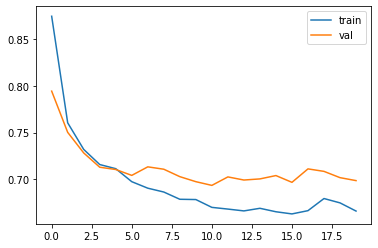

In [ ]:
plt.plot(results1.history["loss"])
plt.plot(results1.history["val_loss"])
plt.legend(labels=["train", "val"])

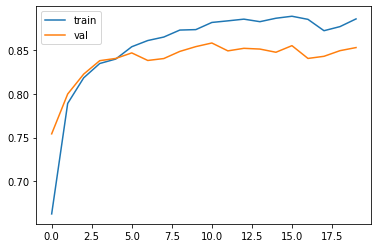

In [ ]:
plt.plot(results1.history["accuracy"])
plt.plot(results1.history["val_accuracy"])
plt.legend(labels=["train", "val"])

# Bi-LSTM


In [ ]:
model2 =Sequential()
model2.add(tfkl.Embedding(vocab_size, 16, input_length=54))
model2.add(tfkl.Bidirectional(tfkl.LSTM(256,return_sequences=True)))
model2.add(tfkl.GlobalMaxPool1D())
model2.add(tfkl.Dropout(0.3))
model2.add(tfkl.Dense(64,activation="relu"))
model2.add(tfkl.Dropout(0.3))
model2.add(tfkl.Dense(3,activation="softmax"))
model2.compile(loss=SparseCategoricalCrossentropy(from_logits=True), optimizer=tfk.optimizers.RMSprop(lr=0.01),metrics=['accuracy'])
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 54, 16)            577872    
_________________________________________________________________
bidirectional (Bidirectional (None, 54, 512)           559104    
_________________________________________________________________
global_max_pooling1d (Global (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1

In [ ]:
results2 = model2.fit(x, y, epochs=20, validation_split=0.2, batch_size=32)

Epoch 1/20
1029/1029 [==============================] - 13s 13ms/step - loss: 0.7515 - accuracy: 0.7995 - val_loss: 0.7491 - val_accuracy: 0.8024
Epoch 2/20
1029/1029 [==============================] - 14s 14ms/step - loss: 0.7499 - accuracy: 0.8011 - val_loss: 0.7734 - val_accuracy: 0.7778
Epoch 3/20
1029/1029 [==============================] - 14s 14ms/step - loss: 0.7584 - accuracy: 0.7927 - val_loss: 0.7570 - val_accuracy: 0.7942
Epoch 4/20
1029/1029 [==============================] - 14s 13ms/step - loss: 0.7555 - accuracy: 0.7956 - val_loss: 0.7534 - val_accuracy: 0.7980
Epoch 5/20
1029/1029 [==============================] - 13s 13ms/step - loss: 0.7523 - accuracy: 0.7990 - val_loss: 0.7536 - val_accuracy: 0.7977
Epoch 6/20
1029/1029 [==============================] - 14s 13ms/step - loss: 0.7585 - accuracy: 0.7926 - val_loss: 0.7548 - val_accuracy: 0.7965
Epoch 7/20
1029/1029 [==============================] - 14s 13ms/step - loss: 0.7528 - accuracy: 0.7985 - val_loss: 0.7438 -

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, train_size=0.80)

In [ ]:
y_pred =model2.predict(x_test)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_bool))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79      3037
           1       0.68      0.87      0.77      1543
           2       0.89      0.76      0.82      3652

    accuracy                           0.80      8232
   macro avg       0.79      0.81      0.79      8232
weighted avg       0.81      0.80      0.80      8232



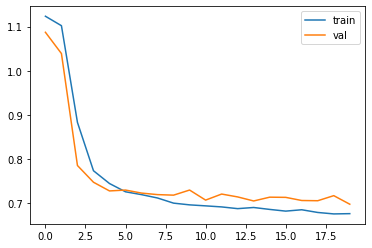

In [ ]:
plt.plot(results2.history["loss"])
plt.plot(results2.history["val_loss"])
plt.legend(labels=["train", "val"])

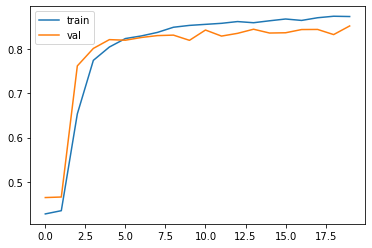

In [ ]:
plt.plot(results2.history["accuracy"])
plt.plot(results2.history["val_accuracy"])
plt.legend(labels=["train", "val"])

# Bidirectional Encoder Representations from Transformers model （BERT）

reference: https://www.kaggle.com/immvab/transformers-covid-19-tweets-sentiment-analysis

In [ ]:
import torch
from tqdm.notebook import tqdm
!pip install transformers
from transformers import BertTokenizer
from torch.utils.data import TensorDataset
import transformers
from transformers import BertForSequenceClassification

     |████████████████████████████████| 1.4MB 13.4MB/s 
     |████████████████████████████████| 890kB 55.3MB/s 
     |████████████████████████████████| 2.9MB 49.3MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp36-none-any.whl size=893261 sha256=713b2487e4bed4e7d54b7ad83dcb205aa9b86c22ad1357f014283cab29358d9a
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


Since BERT was trained with wikipedia data without regular data preprocessing, we combined the original training and testing set as df. 

In [ ]:
train = pd.read_csv('Corona_NLP_train.csv',encoding='latin1')
test = pd.read_csv('Corona_NLP_test.csv',encoding='latin1')
df = pd.concat([train, test])

In [ ]:
# convert sentiment into 3 categories (remain the same labels as previous models)
reclassify = {'Extremely Negative': 'Negative',
            'Negative': 'Negative',
            'Neutral': 'Neutral',
            'Positive':'Positive',
            'Extremely Positive': 'Positive'
           }           
df['Sentiment'].replace(reclassify, inplace=True)

In [ ]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative


In [ ]:
# Encoding classes [total 3]
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['encoded_sentiment'] = encoder.fit_transform(df['Sentiment'])
df.head(5) # label encoding assigned random numerical numbers to sentiment labels 

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment,encoded_sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral,1
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive,2
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive,2
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive,2
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Negative,0


In [ ]:
df['OriginalTweet'] =df['OriginalTweet'].apply(lambda x: ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x).split()))

In [ ]:
# splid the df into training and validation set 
from sklearn.model_selection import train_test_split
xtrain, xval, ytrain, yval = train_test_split(df['OriginalTweet'], df['encoded_sentiment'], test_size = 0.2)


In [ ]:
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased',do_lower_case=True)

In [ ]:
# encoding word to vectors
encoded_data_train = tokenizer.batch_encode_plus(
    xtrain, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=50, # Colab have limited space for student account to set the max_length, we have to use small number here 
    return_tensors='pt'
)

encoded_data_val = tokenizer.batch_encode_plus(
    xval, 
    add_special_tokens=True, 
    return_attention_mask=True, 
    pad_to_max_length=True, 
    max_length=50, 
    return_tensors='pt'
)

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2142: FutureWarning:

The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).



In [ ]:
#Extracting inputs and attention masks out of encoded data 
input_ids_train = encoded_data_train['input_ids']
attention_masks_train = encoded_data_train['attention_mask']
labels_train = torch.tensor(ytrain.values)

input_ids_val = encoded_data_val['input_ids']
attention_masks_val = encoded_data_val['attention_mask']
labels_val = torch.tensor(yval.values)

# Pytorch TensorDataset Instance
dataset_train = TensorDataset(input_ids_train, attention_masks_train, labels_train)
dataset_val = TensorDataset(input_ids_val, attention_masks_val, labels_val)

In [ ]:
# initializing the model
model = transformers.BertForSequenceClassification.from_pretrained("bert-base-uncased",
                                                      num_labels=3, # 3 different labels
                                                      output_attentions=False,
                                                      output_hidden_states=False)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

In [ ]:
#Implementing Dataloaders
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=32) # Since the max_length was set to 50, we decided to try smaller batch size

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=32)

In [ ]:
from transformers import AdamW, get_linear_schedule_with_warmup

optimizer = AdamW(model.parameters(),
                  lr=1e-4, 
                  eps=1e-7)                 
epochs = 5 # Colab limited student account to use epoch<=5 for using CUDA GPU
scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*epochs)

In [ ]:
from sklearn.metrics import f1_score

def f1_score_func(preds, labels):
    preds_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return f1_score(labels_flat, preds_flat, average='weighted')

In [ ]:
import random
seed_val = 17
random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)
device = torch.device('cuda')

check the GPU 

In [ ]:
! nvidia-smi

Sat Dec 12 20:14:57 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.45.01    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8    10W /  70W |     10MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# check if GPU available 
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 18129748347272541930, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 16244550625528000384
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14747550800975902478
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 14640891840
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15592975115036913166
 physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]

In [ ]:
model.to(device)

for epoch in tqdm(range(1, epochs+1)):
    
    model.train()
    
    loss_train_total = 0

    progress_bar = tqdm(dataloader_train, desc='Epoch {:1d}'.format(epoch), leave=False, disable=False)
    for batch in progress_bar:

        model.zero_grad()
        
        batch = tuple(b.to(device) for b in batch)
        
        inputs = {'input_ids':      batch[0].to(device),
                  'attention_mask': batch[1].to(device),
                  'labels':         batch[2].to(device),
                 }       

        outputs = model(**inputs)
        
        loss = outputs[0]
        loss_train_total += loss.item()
        loss.backward()

        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

        optimizer.step()
        scheduler.step()
        
        progress_bar.set_postfix({'training_loss': '{:.3f}'.format(loss.item()/len(batch))})
        
    tqdm.write(f'\nEpoch {epoch}')
    
    loss_train_avg = loss_train_total/len(dataloader_train)            
    tqdm.write(f'Training loss: {loss_train_avg}')


Epoch 1
Training loss: 0.47042051364346227



Epoch 2
Training loss: 0.25911075961229213



Epoch 3
Training loss: 0.16693160394239787



Epoch 4
Training loss: 0.10909835585961417



Epoch 5
Training loss: 0.06599014699033394



In [ ]:
def evaluate(dataloader_val):
    model.eval()
    loss_val_total = 0
    predictions, true_vals = [], []
    
    for batch in dataloader_val:
        batch = tuple(b.to(device) for b in batch)
        inputs = {'input_ids':      batch[0],
                  'attention_mask': batch[1],
                  'labels':         batch[2],
                 }

        with torch.no_grad():        
            outputs = model(**inputs)
   
        loss = outputs[0]
        logits = outputs[1]
        loss_val_total += loss.item()

        logits = logits.detach().cpu().numpy()
        label_ids = inputs['labels'].cpu().numpy()
        predictions.append(logits)
        true_vals.append(label_ids)
    
    loss_val_avg = loss_val_total/len(dataloader_val) 
    predictions = np.concatenate(predictions, axis=0)
    true_vals = np.concatenate(true_vals, axis=0)
            
    return loss_val_avg, predictions, true_vals


In [ ]:
val_loss, predictions, true_vals = evaluate(dataloader_validation)
val_f1 = f1_score_func(predictions, true_vals)
print('Val Loss = ', val_loss)
print('Val F1 = ', val_f1)

Val Loss =  0.42371934581319287
Val F1 =  0.9073770999949471


In [ ]:
encoded_classes = encoder.classes_
predicted_category = [encoded_classes[np.argmax(x)] for x in predictions]
true_category = [encoded_classes[x] for x in true_vals]

In [ ]:
x = 0
for i in range(len(true_category)):
    if true_category[i] == predicted_category[i]:
        x += 1
        
print('Accuracy Score = ', x / len(true_category))

Accuracy Score =  0.9064620175731287
